**About the DataSet**  
Source:https://www.kaggle.com/datasets/uciml/adult-census-income/data  
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).   
The prediction task is to determine whether a person makes over $50K a year.

**Meaning of Columns in DataSet**  
**age**:The age of the individual  
**workclass**:The type of employment the individual has  
**fnlwgt**:This stands for "final weight." It represents the number of people in the population that the census believes this particular entry represents  
**education**: The highest level of education achieved by an individual  
**education.num**: The highest level of education achieved in numerical form  
**marital.status**: Marital status of an individual  
**occupation**: The type of occupation of an individual   
**relationship**: Represents what this individual is relative to others  
**race**: Descriptions of an individual’s race
**sex**: Gender
**capital.gain**: Capital gains for an individual  
**capital.loss**: Capital loss for an individual 
**hours.per.week**: The hours an individual has reported to work per week  
**native.country**: Country of origin for an individual  
**income**: Whether or not an individual makes more than $50,000 annually  

In [86]:
import numpy as np
import pandas as pd


**Loading DataSet**

In [87]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**Checking Size and Column Types**

In [88]:
df.shape

(32561, 15)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Checking for Null and Duplicate entries and dropping them**

In [90]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [91]:
df.duplicated().sum()

np.int64(24)

In [92]:
df.drop_duplicates(inplace=True)

In [93]:
df.shape

(32537, 15)

**Checking for Unique Entries in Each Column**

In [94]:
for col in df.columns:
    print(col,df[col].unique())

age [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
fnlwgt [ 77053 132870 186061 ...  34066  84661 257302]
education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
education.num [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-

**workclass,occupation,native.country** contains "?" Counting such entries

In [95]:
df.workclass.value_counts(dropna=False,normalize=True)*100

workclass
Private             69.683745
Self-emp-not-inc     7.806497
Local-gov            6.432677
?                    5.642807
State-gov            3.989304
Self-emp-inc         3.429941
Federal-gov          2.950487
Without-pay          0.043028
Never-worked         0.021514
Name: proportion, dtype: float64

In [96]:
df.occupation.value_counts(dropna=False,normalize=True)*100

occupation
Prof-specialty       12.711682
Craft-repair         12.582598
Exec-managerial      12.493469
Adm-clerical         11.580662
Sales                11.217998
Other-service        10.114639
Machine-op-inspct     6.146848
?                     5.664321
Transport-moving      4.908258
Handlers-cleaners     4.207518
Farming-fishing       3.048837
Tech-support          2.849064
Protective-serv       1.994652
Priv-house-serv       0.451793
Armed-Forces          0.027661
Name: proportion, dtype: float64

In [97]:
df["native.country"].value_counts(dropna=False,normalize=True)*100

native.country
United-States                 89.599533
Mexico                         1.963918
?                              1.788733
Philippines                    0.608538
Germany                        0.421059
Canada                         0.371884
Puerto-Rico                    0.350370
El-Salvador                    0.325783
India                          0.307342
Cuba                           0.291975
England                        0.276608
Jamaica                        0.248947
South                          0.245874
China                          0.230507
Italy                          0.224360
Dominican-Republic             0.215140
Vietnam                        0.205919
Guatemala                      0.190552
Japan                          0.190552
Poland                         0.184405
Columbia                       0.181332
Taiwan                         0.156745
Haiti                          0.135231
Iran                           0.132157
Portugal                 

**As maximum ratio of "?" entries is low (5.66%)**, would be dropping these rows instead of replacing these with most frequent value 

In [98]:
df["workclass"]=df["workclass"].replace("?",np.nan)
df["occupation"]=df["occupation"].replace("?",np.nan)
df["native.country"]=df["native.country"].replace("?",np.nan)

In [99]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [100]:
df.dropna(inplace=True)

In [101]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [102]:
df.shape

(30139, 15)

**Data Visualization**

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [105]:
df["income"]=df["income"].apply(lambda x:0 if x=="<=50K" else 1)

In [106]:
df.income

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30139, dtype: int64

<Axes: >

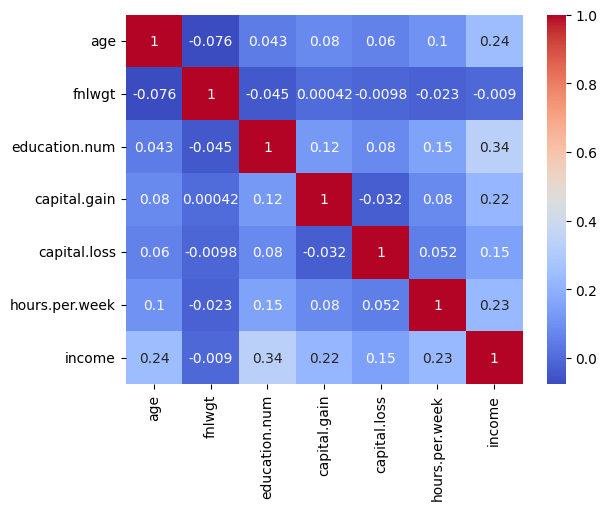

In [110]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")

In Above Numerical Columns correlation, Final Weight is having very less correlation and can be dropped. While Education has the highest correlation with income column followed by age

Showing relationship of age, education,hours per week with income

<Axes: xlabel='income', ylabel='age'>

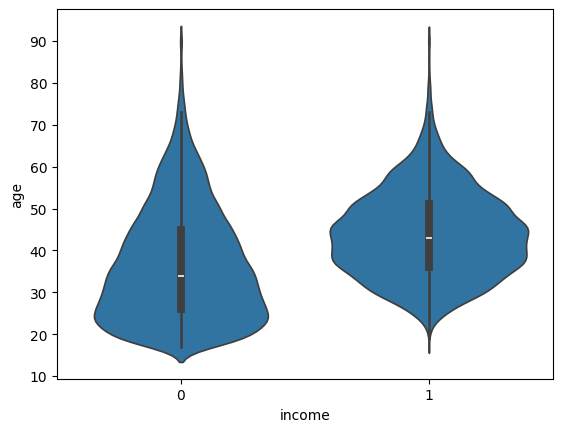

In [111]:
sns.violinplot(x="income",y="age",data=df)

<Axes: xlabel='income', ylabel='education.num'>

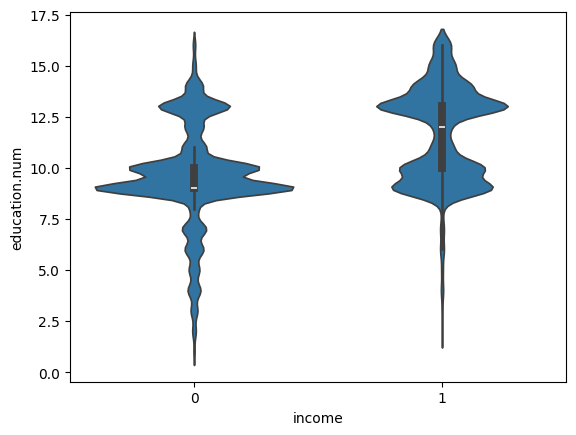

In [112]:
sns.violinplot(x="income",y="education.num",data=df)

<Axes: xlabel='income', ylabel='hours.per.week'>

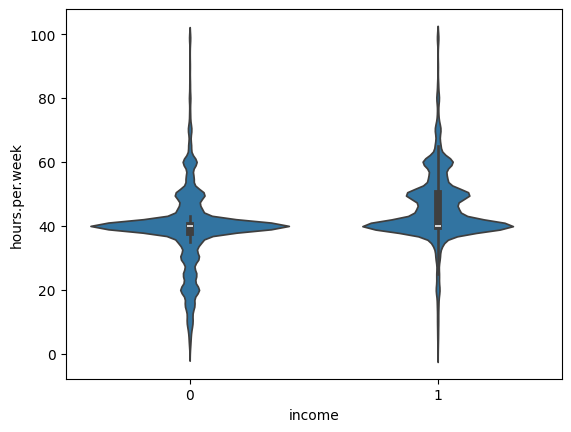

In [113]:
sns.violinplot(x="income",y="hours.per.week",data=df)

<Axes: xlabel='income', ylabel='capital.gain'>

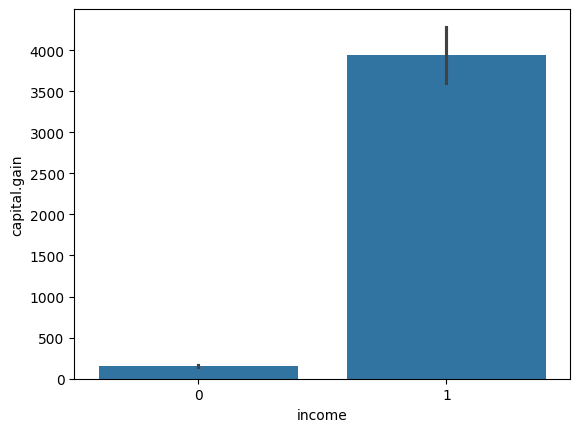

In [114]:
sns.barplot(x="income",y="capital.gain",data=df)

<Axes: xlabel='income', ylabel='capital.loss'>

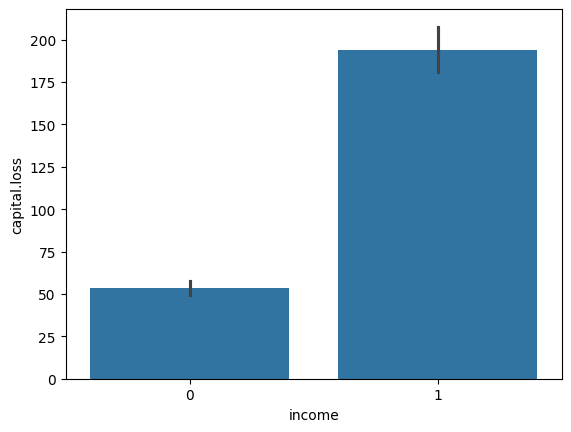

In [115]:
sns.barplot(x="income",y="capital.loss",data=df)

<Axes: xlabel='occupation', ylabel='count'>

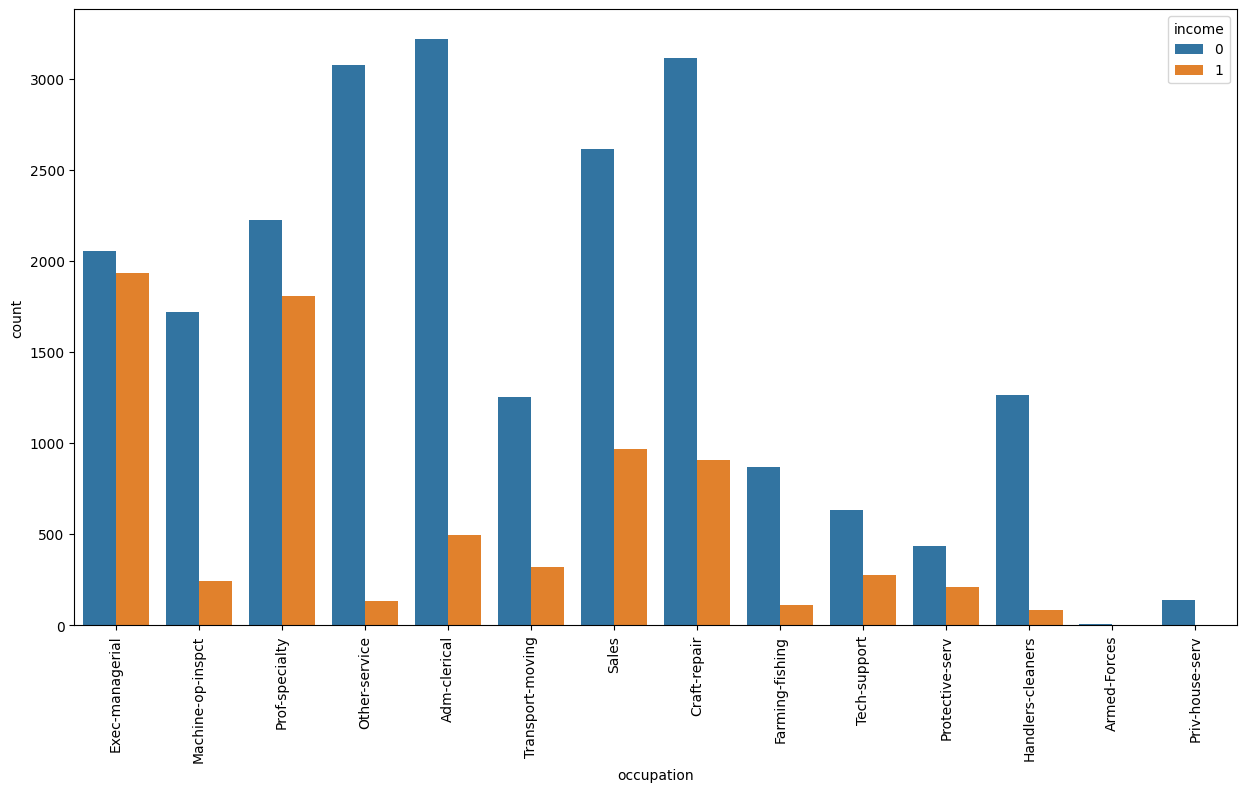

In [116]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x="occupation",data=df,hue="income")

<Axes: xlabel='workclass', ylabel='count'>

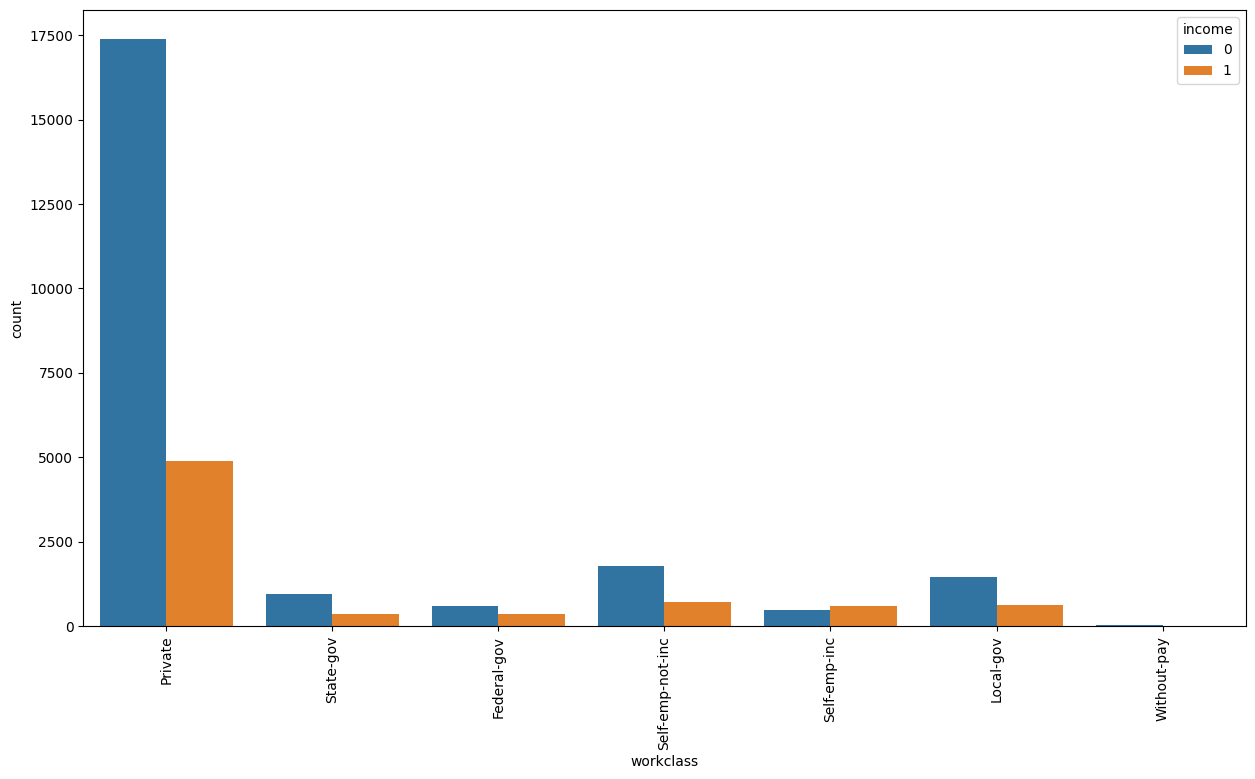

In [117]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x="workclass",data=df,hue="income")

<Axes: xlabel='marital.status', ylabel='count'>

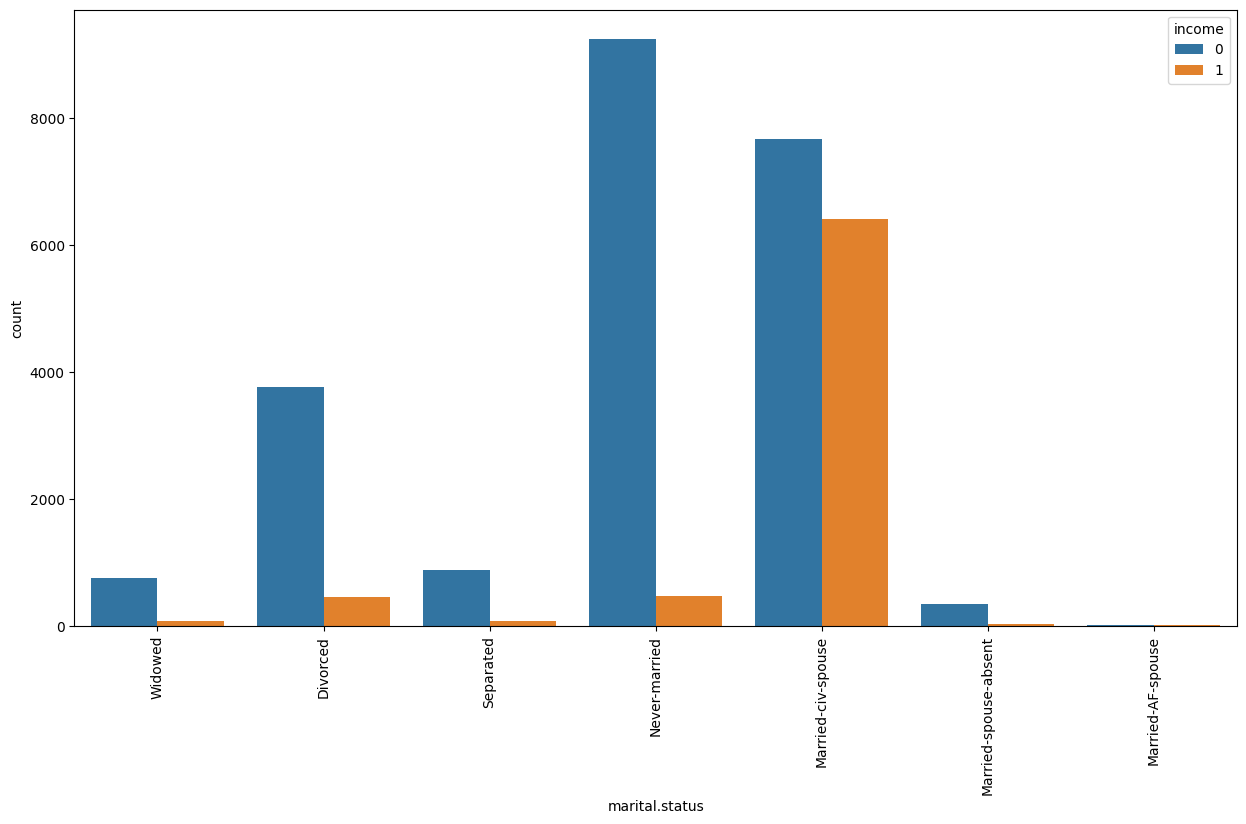

In [118]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x="marital.status",data=df,hue="income")

<Axes: xlabel='relationship', ylabel='count'>

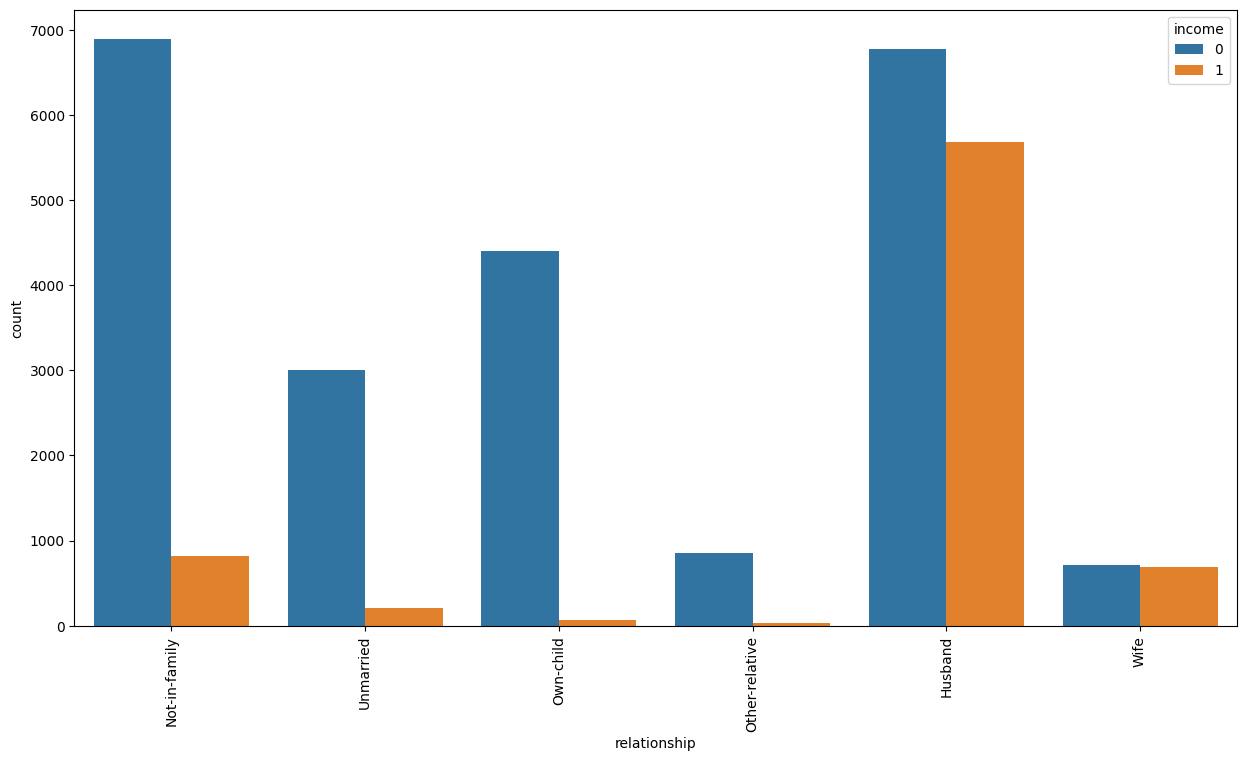

In [119]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x="relationship",data=df,hue="income")

<Axes: xlabel='race', ylabel='count'>

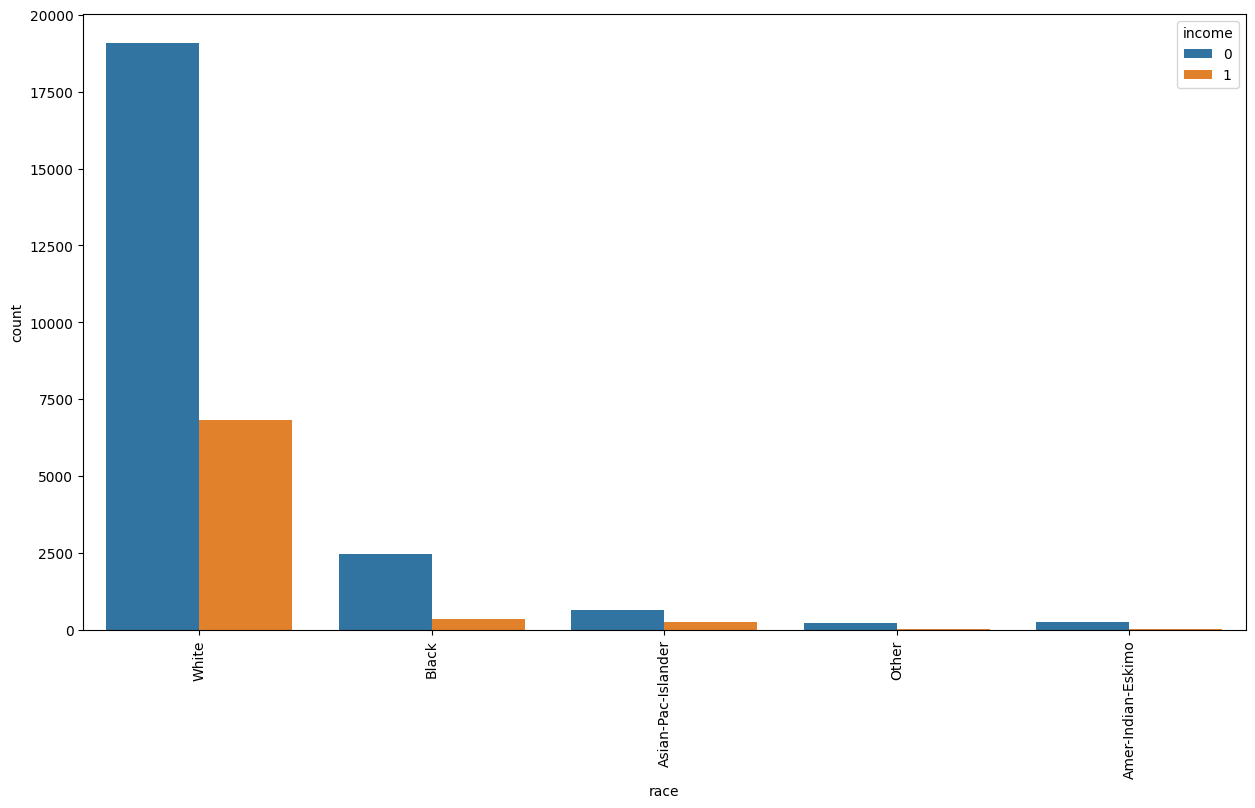

In [120]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x="race",data=df,hue="income")

<Axes: xlabel='sex', ylabel='count'>

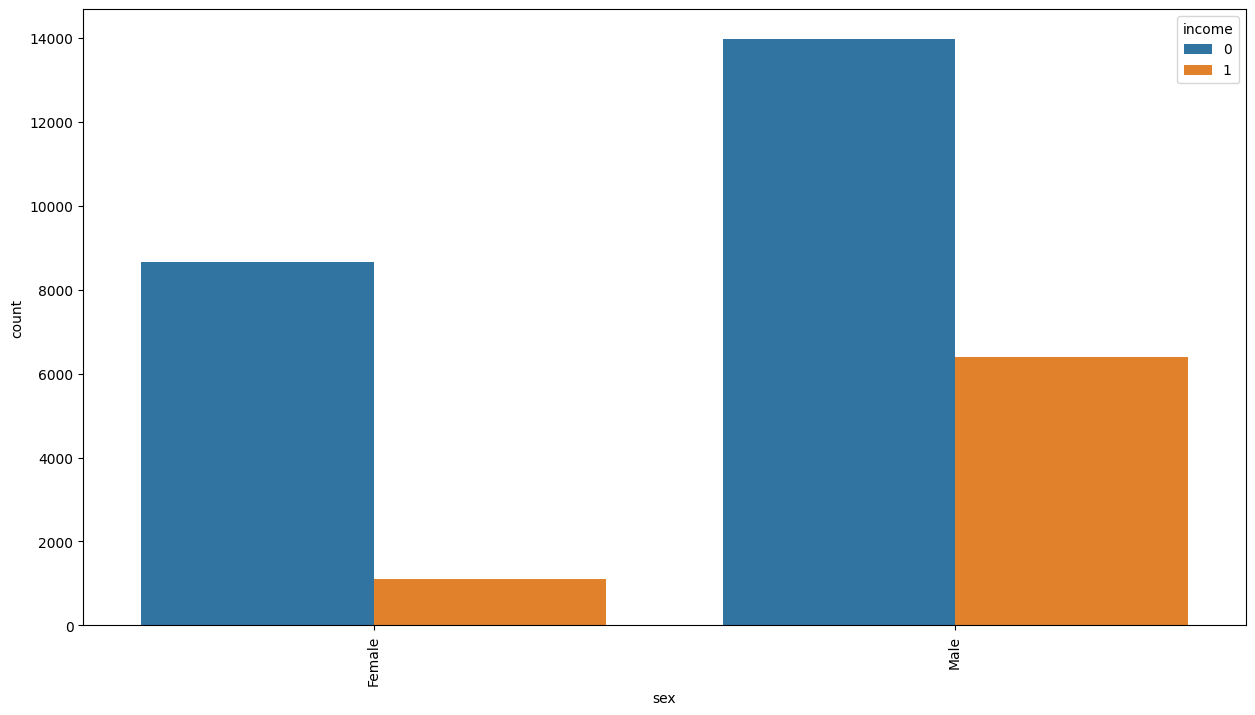

In [121]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x="sex",data=df,hue="income")

<Axes: xlabel='native.country', ylabel='count'>

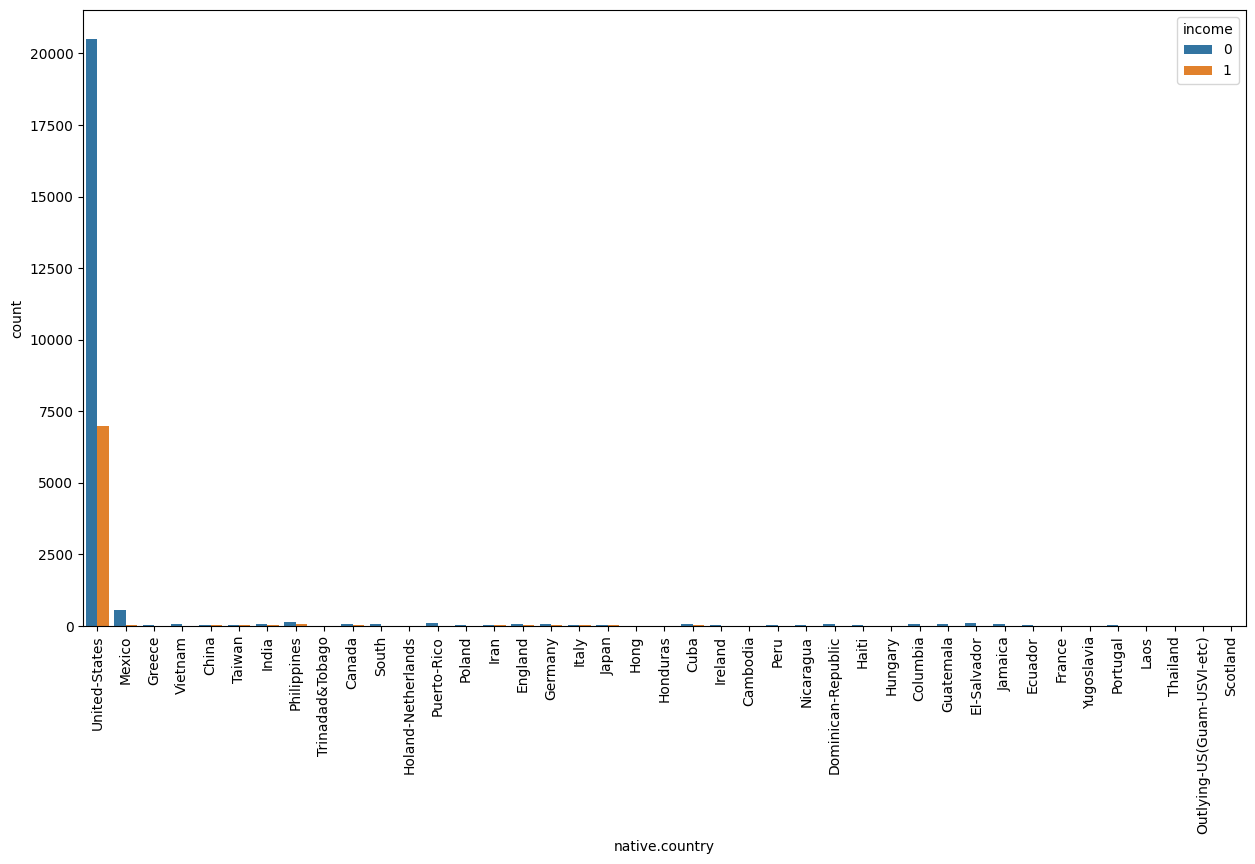

In [122]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x="native.country",data=df,hue="income")

In [429]:
df.income.value_counts()

income
0    22633
1     7506
Name: count, dtype: int64

As observed in above Charts and Value distribution, Target is imbalanced with more entries for income <50K,
which also represents income distribution prevalent in society.

**Preparing Data for Model Tuning**

In [123]:
#Capital Gain, Loss columns to be normalized between 0 to 100
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((0,100))
df[["capital_gain_norm"]]=scaler.fit_transform(df[["capital.gain"]])
df[["capital_loss_norm"]]=scaler.fit_transform(df[["capital.loss"]])

In [124]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital_gain_norm,capital_loss_norm
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,0.0,100.000000
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,0.0,89.531680
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,0.0,89.531680
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0,0.0,86.547291
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0,0.0,86.547291


In [125]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'capital_gain_norm', 'capital_loss_norm'],
      dtype='object')

In [126]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [127]:
df["workclass_enc"]=label_encoder.fit_transform(df["workclass"])

In [128]:
df['marital.status_enc']=label_encoder.fit_transform(df['marital.status'])
df['occupation_enc']=label_encoder.fit_transform(df['occupation'])
df['relationship_enc']=label_encoder.fit_transform(df['relationship'])
df['race_enc']=label_encoder.fit_transform(df['race'])
df['sex_enc']=label_encoder.fit_transform(df['sex'])
df['native.country_enc']=label_encoder.fit_transform(df['native.country'])

In [129]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital_gain_norm,capital_loss_norm,workclass_enc,marital.status_enc,occupation_enc,relationship_enc,race_enc,sex_enc,native.country_enc
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,0.0,100.000000,2,6,3,1,4,0,38
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,0.0,89.531680,2,0,6,4,4,0,38
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,0.0,89.531680,2,5,9,3,4,0,38
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0,0.0,86.547291,2,0,7,4,4,0,38
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0,0.0,86.547291,2,5,0,4,4,1,38


In [130]:
pd.set_option("display.max_columns",25)

In [131]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital_gain_norm,capital_loss_norm,workclass_enc,marital.status_enc,occupation_enc,relationship_enc,race_enc,sex_enc,native.country_enc
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,0.0,100.000000,2,6,3,1,4,0,38
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,0.0,89.531680,2,0,6,4,4,0,38
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,0.0,89.531680,2,5,9,3,4,0,38
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0,0.0,86.547291,2,0,7,4,4,0,38
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0,0.0,86.547291,2,5,0,4,4,1,38


**Splitting Data into Train, Test and Applying Model**

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X=df[['age','education.num','hours.per.week','capital_gain_norm', 'capital_loss_norm', 'workclass_enc',
       'marital.status_enc', 'occupation_enc', 'relationship_enc', 'race_enc',
       'sex_enc', 'native.country_enc']]
X.head()

,age,education.num,hours.per.week,capital_gain_norm,capital_loss_norm,workclass_enc,marital.status_enc,occupation_enc,relationship_enc,race_enc,sex_enc,native.country_enc
1,82,9,18,0.0,100.000000,2,6,3,1,4,0,38
3,54,4,40,0.0,89.531680,2,0,6,4,4,0,38
4,41,10,40,0.0,89.531680,2,5,9,3,4,0,38
5,34,9,45,0.0,86.547291,2,0,7,4,4,0,38
6,38,6,40,0.0,86.547291,2,5,0,4,4,1,38


In [134]:
y=df["income"]

In [431]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) #To have similar distribution of y in test and train data

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [137]:
model_dtc=DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train,y_train)

model_rfc=RandomForestClassifier(random_state=42)
model_rfc.fit(X_train,y_train)

model_gbc=GradientBoostingClassifier(random_state=42)
model_gbc.fit(X_train,y_train)


GradientBoostingClassifier(random_state=42)

In [432]:
model_dtc.score(X_train,y_train) #Score gives accuracy

0.9776865331176642

In [139]:
model_dtc.score(X_test,y_test)

0.8138686131386861

In [140]:
model_rfc.score(X_train,y_train)

0.9776035834266518

In [141]:
model_rfc.score(X_test,y_test)

0.8488719309887193

In [142]:
model_gbc.score(X_train,y_train)

0.8637551325121314

In [143]:
model_gbc.score(X_test,y_test)

0.8644658261446583

DecisionTree and RandomForest Classifier both give very high score(accuracy) 
on Training Data (likely case of OverFitting) while Score on Test Data is relatively less.
GradientBoosting gives more or less equal score against both Training and Testing Data and gives highest score out of the three models 
when used on testing data

**Now Applying HyperParameter Tuning on Decision Tree Classifier to Check for Improvement in Model Performance**

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
grid={"max_depth":[2,3,4,5],"min_samples_split":[2,3,4],"min_samples_leaf":range(1,7)}

In [146]:
gcv=GridSearchCV(estimator=model_dtc,param_grid=grid)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': [2, 3, 4]})

In [147]:
model_dcf_=gcv.best_estimator_
model_dcf_.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=42)

In [148]:
model_dcf_.score(X_train,y_train)

0.8431421342955497

In [149]:
model_dcf_.score(X_test,y_test)

0.8462176509621765

DecisionTreeClassifier Score (Accuracy) has improved from **0.814 to 0.846**

In [188]:
grid_rf={"n_estimators":[100,150,200],"max_depth":[7,8,9],
         "min_samples_split":[2,3,5,10],"min_samples_leaf":[2,5]}

In [189]:
gcv_rf=GridSearchCV(estimator=model_rfc,param_grid=grid_rf,cv=6)
gcv_rf.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 150, 200]})

In [190]:
model_rfc_=gcv_rf.best_estimator_
model_rfc_.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [191]:
gcv_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [232]:
model_rfc_.score(X_train,y_train)

0.8583634025963254

In [192]:
model_rfc_.score(X_test,y_test)

0.8574983410749835

RandomForestClassifier Score (Accuracy) has improved from 0.849 to 0.857

In [239]:
grid_gb={"n_estimators":[150,200],"max_depth":[6,7],
         "min_samples_split":[5],"min_samples_leaf":[2],
        "learning_rate":[0.1]}

In [240]:
gcv_gb=GridSearchCV(estimator=model_gbc,param_grid=grid_gb,n_jobs=-1)
gcv_gb.fit(X_train,y_train)

C:\Users\Hp\.conda\envs\bia\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 7],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [150, 200]})

In [242]:
model_gbc_=gcv_gb.best_estimator_
model_gbc_.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5,
                           n_estimators=150, random_state=42)

In [241]:
gcv_gb.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [243]:
model_gbc_.score(X_train,y_train)

0.8936170212765957

In [244]:
model_gbc_.score(X_test,y_test)

0.8769077637690776

GradientBoostClassifier Score (Accuracy) has improved from 0.864 to 0.877

**Printing Classification Reports for all 3 Models**

In [193]:
from sklearn.metrics import classification_report

In [245]:
y_pred_dcf=model_dcf_.predict(X_test)
y_pred_rcf=model_rfc_.predict(X_test)
y_pred_gbc=model_gbc_.predict(X_test)


Accuracy= (TP+ TN) / Total Predictions
Precision= TP / (TP+FP) // Shows how many positive predictions were actually positive  
Recall= TP / (TP+FN) // Shows how many True Postive cases were actually captured  
F1-Score = 2× (Precision×Recall) / (Precision+Recall) // mean of precision and recall  

In [246]:
print("Decision Tree Classification Report")
print(classification_report(y_test,y_pred_dcf))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      4527
           1       0.53      0.83      0.65      1501

    accuracy                           0.78      6028
   macro avg       0.73      0.80      0.74      6028
weighted avg       0.83      0.78      0.79      6028



In [247]:
print("Random Forest Classification Report")
print(classification_report(y_test,y_pred_rcf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4527
           1       0.81      0.56      0.66      1501

    accuracy                           0.86      6028
   macro avg       0.84      0.76      0.79      6028
weighted avg       0.85      0.86      0.85      6028



In [248]:
print("Gradient Boosting Classification Report")
print(classification_report(y_test,y_pred_gbc))

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4527
           1       0.79      0.68      0.73      1501

    accuracy                           0.88      6028
   macro avg       0.85      0.81      0.83      6028
weighted avg       0.87      0.88      0.87      6028



Target Variable Class 1 Performance is relatively low

In [249]:
from imblearn.over_sampling import SMOTE

In [252]:
smote = SMOTE(random_state=42)

In [253]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [254]:
X_train_resampled.shape

(36212, 12)

In [255]:
y_train_resampled.shape

(36212,)

In [256]:
y_train_resampled.value_counts()

income
0    18106
1    18106
Name: count, dtype: int64

In [205]:
y_train.value_counts()

income
0    18106
1     6005
Name: count, dtype: int64

In [268]:
model_dcf_rs=DecisionTreeClassifier(random_state=42)
model_rfc_rs=RandomForestClassifier(random_state=42)
model_gbc_rs=GradientBoostingClassifier(random_state=42)

In [269]:
gcv2=GridSearchCV(estimator=model_dcf_rs,param_grid=grid)

In [270]:
gcv2.fit(X_train_resampled,y_train_resampled)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': [2, 3, 4]})

In [271]:
model_dcf_rs=gcv2.best_estimator_
model_dcf_rs.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [272]:
gcv_rf2=GridSearchCV(estimator=model_rfc_rs,param_grid=grid_rf)
gcv_rf2.fit(X_train_resampled,y_train_resampled)


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 150, 200]})

In [273]:
model_rfc_rs=gcv_rf2.best_estimator_
model_rfc_rs.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=150, random_state=42)

In [279]:
gcv_gb2=GridSearchCV(estimator=model_gbc_rs,param_grid=grid_gb,n_jobs=-1)
gcv_gb2.fit(X_train_resampled,y_train_resampled)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 7],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [150, 200]})

In [280]:
model_gbc_rs=gcv_gb2.best_estimator_
model_gbc_rs.fit(X_train_resampled,y_train_resampled)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                           n_estimators=200, random_state=42)

In [281]:
y_pred_dcf2=model_dcf_rs.predict(X_test)
y_pred_rcf2=model_rfc_rs.predict(X_test)
y_pred_gbc2=model_gbc_rs.predict(X_test)

In [282]:
print("Decision Tree Classification Report after resampling")
print(classification_report(y_test,y_pred_dcf2))

Decision Tree Classification Report after resampling
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      4527
           1       0.53      0.83      0.65      1501

    accuracy                           0.78      6028
   macro avg       0.73      0.80      0.74      6028
weighted avg       0.83      0.78      0.79      6028



In [283]:
print("Random Forest Classification Report after resampling")
print(classification_report(y_test,y_pred_rcf2))

Random Forest Classification Report after resampling
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4527
           1       0.57      0.85      0.68      1501

    accuracy                           0.80      6028
   macro avg       0.76      0.82      0.77      6028
weighted avg       0.85      0.80      0.81      6028



In [284]:
print("Gradient Boosting Classification Report Pre Sampling")
print(classification_report(y_test,y_pred_gbc))

Gradient Boosting Classification Report Pre Sampling
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4527
           1       0.79      0.68      0.73      1501

    accuracy                           0.88      6028
   macro avg       0.85      0.81      0.83      6028
weighted avg       0.87      0.88      0.87      6028



In [285]:
print("Gradient Boosting Classification Report Post Resampling")
print(classification_report(y_test,y_pred_gbc2))

Gradient Boosting Classification Report Post Resampling
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4527
           1       0.65      0.82      0.72      1501

    accuracy                           0.84      6028
   macro avg       0.79      0.84      0.81      6028
weighted avg       0.86      0.84      0.85      6028



Resampling has improved recall value for class 1 while negatively impacting class 0 recall performance while precision has degraded for class 1 with F1 score 
having no major change

In [286]:
from xgboost import XGBClassifier

In [295]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [296]:
model_xgb.score(X_train,y_train)

0.8962714113889926

In [297]:
model_xgb.score(X_test,y_test)

0.8749170537491705

In [298]:
y_pred_xgb=model_xgb.predict(X_test)

In [299]:
print("XGradient Boosting Classification Report")
print(classification_report(y_test,y_pred_xgb))

XGradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4527
           1       0.79      0.68      0.73      1501

    accuracy                           0.87      6028
   macro avg       0.84      0.81      0.83      6028
weighted avg       0.87      0.87      0.87      6028



In [300]:
model_xgb2 = XGBClassifier(random_state=42)
model_xgb2.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [301]:
y_pred_xgb2=model_xgb2.predict(X_test)

In [302]:
print("XGradient Boosting Classification Report2")
print(classification_report(y_test,y_pred_xgb2))

XGradient Boosting Classification Report2
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4527
           1       0.64      0.82      0.72      1501

    accuracy                           0.84      6028
   macro avg       0.79      0.83      0.80      6028
weighted avg       0.86      0.84      0.85      6028



XGBClassifier Performance is much faster than Gradient Boosting and Results are comparable

In [303]:
from sklearn.metrics import confusion_matrix

In [437]:
cm=confusion_matrix(y_test,y_pred_xgb)

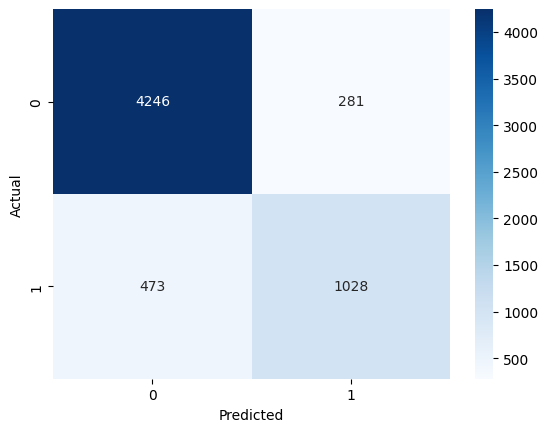

In [438]:
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [439]:
cm2=confusion_matrix(y_test,y_pred_xgb2)

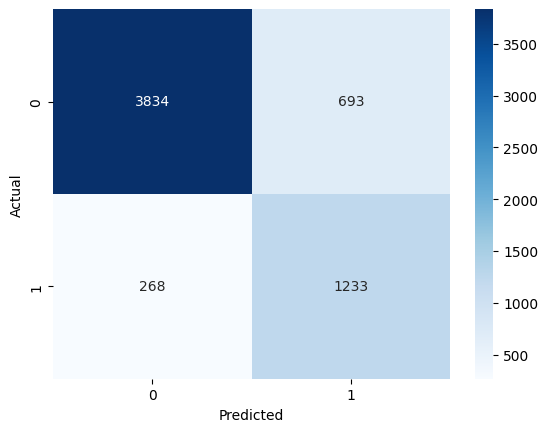

In [441]:
sns.heatmap(cm2, annot=True, cmap='Blues',fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

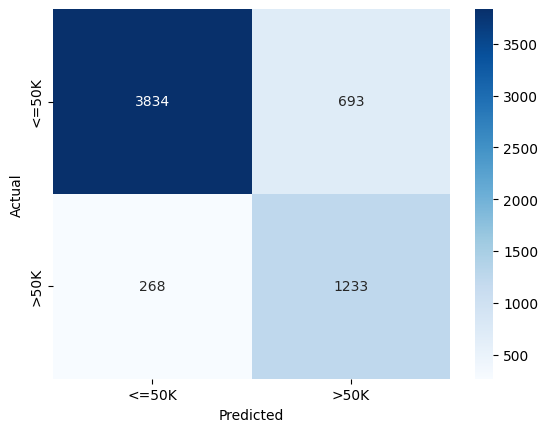

In [306]:
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [539]:
y_pred_prob=model_xgb.predict_proba(X_test)
y_pred_prob

array([[0.9871282 , 0.01287181],
       [0.9962692 , 0.00373075],
       [0.73886853, 0.26113147],
       ...,
       [0.95252526, 0.04747476],
       [0.00263625, 0.99736375],
       [0.5620371 , 0.43796292]], dtype=float32)

In [543]:
y_pred_prob=model_xgb.predict_proba(X_test)[:,1]

In [544]:
y_pred_prob

array([0.01287181, 0.00373075, 0.26113147, ..., 0.04747476, 0.99736375,
       0.43796292], dtype=float32)

In [546]:
threshold=0.2

In [547]:
y_pred_adjusted=(y_pred_prob>=threshold).astype(int)
y_pred_adjusted

array([0, 0, 1, ..., 0, 1, 1])

In [548]:
print(classification_report(y_test,y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      4527
           1       0.59      0.90      0.71      1501

    accuracy                           0.82      6028
   macro avg       0.78      0.85      0.79      6028
weighted avg       0.87      0.82      0.83      6028



In [549]:
cm3=confusion_matrix(y_test,y_pred_adjusted)

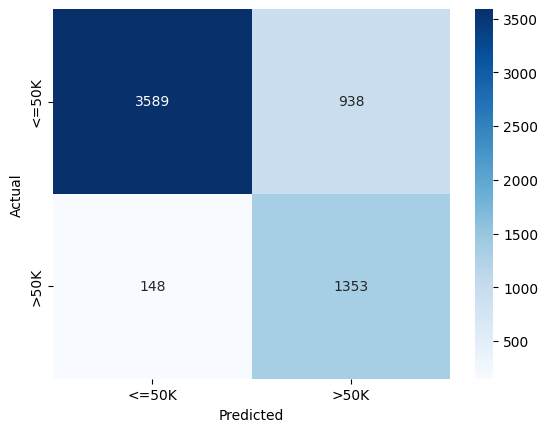

In [550]:
sns.heatmap(cm3, annot=True, fmt="d", cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [551]:
threshold=0.40

In [552]:
y_pred_adjusted=(y_pred_prob>=threshold).astype(int)
print(classification_report(y_test,y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4527
           1       0.72      0.75      0.74      1501

    accuracy                           0.87      6028
   macro avg       0.82      0.83      0.82      6028
weighted avg       0.87      0.87      0.87      6028



In [553]:
cm4=confusion_matrix(y_test,y_pred_adjusted)

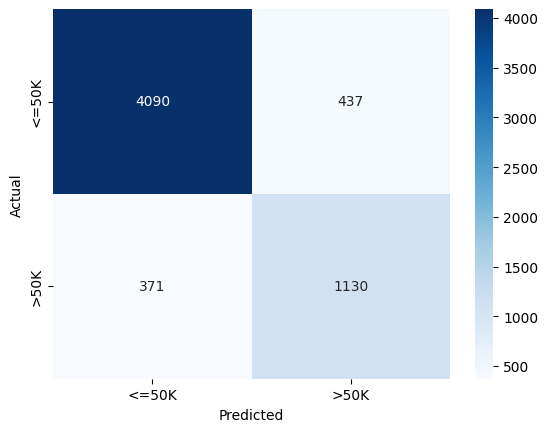

In [554]:
sns.heatmap(cm4, annot=True, fmt="d", cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Depending upon requirement / use case; relevant methodolgy can be used. Is identifying Indiviudals earning income less than 50K is more**  
**important or vice versa?**  
*With Default settings due to class imbalance, Model is better at identifying Income Group <50K. With Threshold tuning, Income Group >50K can be more accurately captured with some trade-off observed in Income Group <50K*